In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Data manipulation
import numpy as np
import pandas as pd

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Custom modules
from src.data.load_dataset import load_spambase, extract_feature_names

In [9]:
feature_names = extract_feature_names()
features, target = load_spambase()
features.shape, target.shape

((4601, 57), (4601,))

In [10]:
feature_df = pd.DataFrame(features, columns=feature_names)
feature_df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61.0,278.0
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101.0,1028.0
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485.0,2259.0
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40.0,191.0
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40.0,191.0


In [21]:
target_df = pd.DataFrame(target, columns=['spam'])
target_df.head()

,spam
0,1
1,1
2,1
3,1
4,1


In [22]:
df = pd.concat([feature_df, target_df], axis=1)
df.head()   

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61.0,278.0,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101.0,1028.0,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485.0,2259.0,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40.0,191.0,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40.0,191.0,1


## 1. Preliminary Data Check

Check for missing values and data types.

### 1 a. Missing Values

In [23]:
feature_df.isna().sum().sum()

0

In [24]:
target_df.isna().sum().sum()

0

### 1 b. Data Types

In [25]:
feature_df.dtypes.unique() # all features are floats

array([dtype('float64')], dtype=object)

* No missing values
* All features are floats

## 2. Data Distribution Analysis

* Univariate Analysis: Histograms or density plots for all features.
* Summary Statistics: Descriptive statistics for central tendency and dispersion.

### 2 a. Univariate Analysis

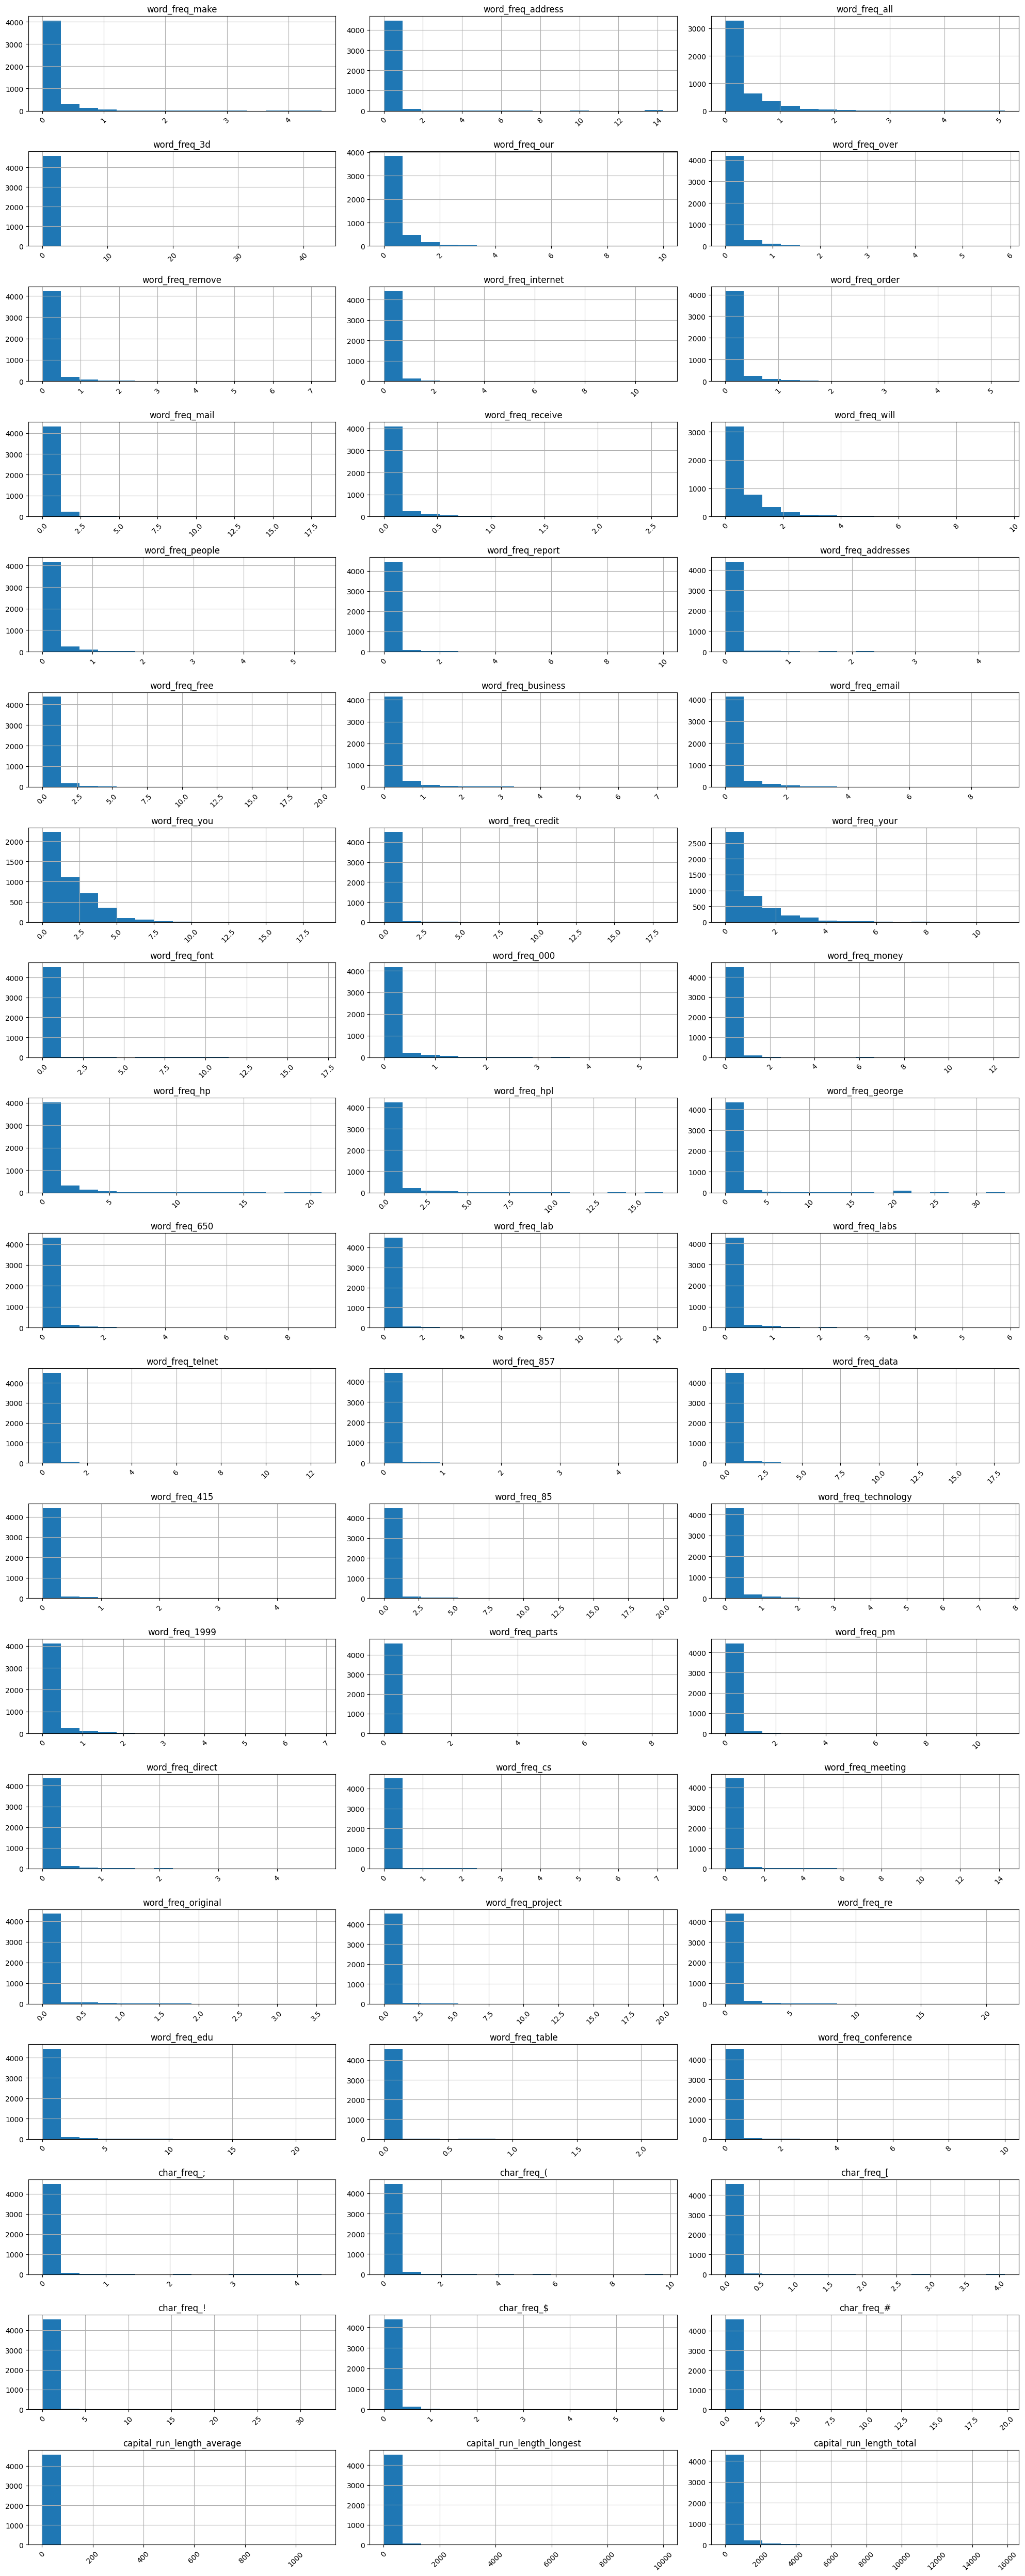

In [26]:
# Univariate Analysis: Plot histograms for all continuous features.
def plot_histograms(dataframe):
    dataframe.hist(bins=15, figsize=(20, 50), layout=(19, 3), xrot=45)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    plt.tight_layout()
    plt.show()

plot_histograms(feature_df)  # Plot histograms of all features

In [27]:
# Most of the features are skewed to the right. We may need to transform them to make them more normally distributed.
# For now, planning to build decision trees, so no need to transform the features.
# We can also use decision trees to identify the most important features and then use those for further analysis.

### 2 b. Summary Statistics

In [28]:
# Summary Statistics: Generate descriptive statistics for all features.
summary_statistics = feature_df.describe().transpose()
summary_statistics['skew'] = feature_df.skew()
summary_statistics['kurtosis'] = feature_df.kurtosis()
# round values 
summary_statistics = summary_statistics.round(2)
summary_statistics

,count,mean,std,min,25%,50%,75%,max,skew,kurtosis
word_freq_make,4601.0,0.10,0.31,0.0,0.00,0.00,0.00,4.54,5.68,49.31
word_freq_address,4601.0,0.21,1.29,0.0,0.00,0.00,0.00,14.28,10.09,105.65
word_freq_all,4601.0,0.28,0.50,0.0,0.00,0.00,0.42,5.10,3.01,13.31
word_freq_3d,4601.0,0.07,1.40,0.0,0.00,0.00,0.00,42.81,26.23,726.45
word_freq_our,4601.0,0.31,0.67,0.0,0.00,0.00,0.38,10.00,4.75,37.94
word_freq_over,4601.0,0.10,0.27,0.0,0.00,0.00,0.00,5.88,5.96,68.45
word_freq_remove,4601.0,0.11,0.39,0.0,0.00,0.00,0.00,7.27,6.77,75.41
word_freq_internet,4601.0,0.11,0.40,0.0,0.00,0.00,0.00,11.11,9.72,169.16
word_freq_order,4601.0,0.09,0.28,0.0,0.00,0.00,0.00,5.26,5.23,46.94
word_freq_mail,4601.0,0.24,0.64,0.0,0.00,0.00,0.16,18.18,8.49,161.21


1. Count: The number of non-null entries for each feature. All features have the same count, indicating no missing values.
2. Mean: The average value of each feature across all emails. Most features have low mean values, suggesting that most words or characters are not frequently occurring.
3. Standard Deviation (std): A measure of the amount of variation or dispersion in each feature. A high standard deviation relative to the mean suggests that there are emails with very high word or character frequencies, indicating potential outliers or a highly skewed distribution.
4. Min, 25%, 50% (Median), 75%, Max: For many features, the 75th percentile is very low or zero, which indicates that the majority of the emails have few or none of these words or characters, reinforcing the presence of skewness.
5. Skew: A measure of the asymmetry of the probability distribution. Positive skew values indicate a distribution with a tail extending towards more positive values (right-skewed). The high skew values here suggest that most of the distribution is clustered near zero, with a long tail to the right.
6. Kurtosis: A measure of the "tailedness" of the probability distribution. High kurtosis values indicate a distribution with heavy tails and sharp peaks, which in this case suggests the presence of outliers.


Summary:
* Skewed Features: The high skewness in almost all features indicates that the majority of the data points have low or zero word frequencies, with only a few emails having high frequencies.
* Outliers: The high kurtosis values for many features suggest that there are outliers with unusually high word or character frequencies.
* Potential Preprocessing Steps: Given the skewness and kurtosis, we may need to consider transforming these features to reduce the effect of outliers. This could include applying log transformations, binarizing the features, or using robust scalers.
* Word Frequencies vs. Spam Detection: Some features have a wide range of values (indicated by the 'max' column), which might be important for detecting spam. However, the mean and median values being low suggests that these high values are not common.

## 3. Class Distribution

Examine the balance between the classes in the target variable.

In [29]:
from src.visualization.eda import plot_class_distribution

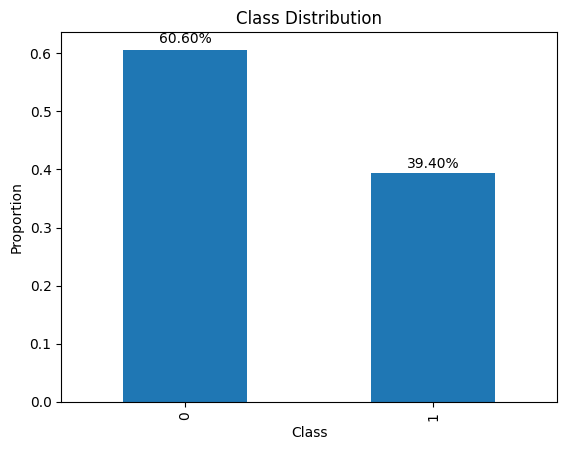

In [30]:
plot_class_distribution(
    df=df,
    target='spam',
)

The target variable is imbalanced. We may need to use stratified sampling when splitting the data into training and test sets. It ensures that the train and test sets have the same proportions of class labels as the original dataset.

## 4. Feature Relationships

### 4 a. Boxplots/Violin Plots

Distribution of feature values across classes.

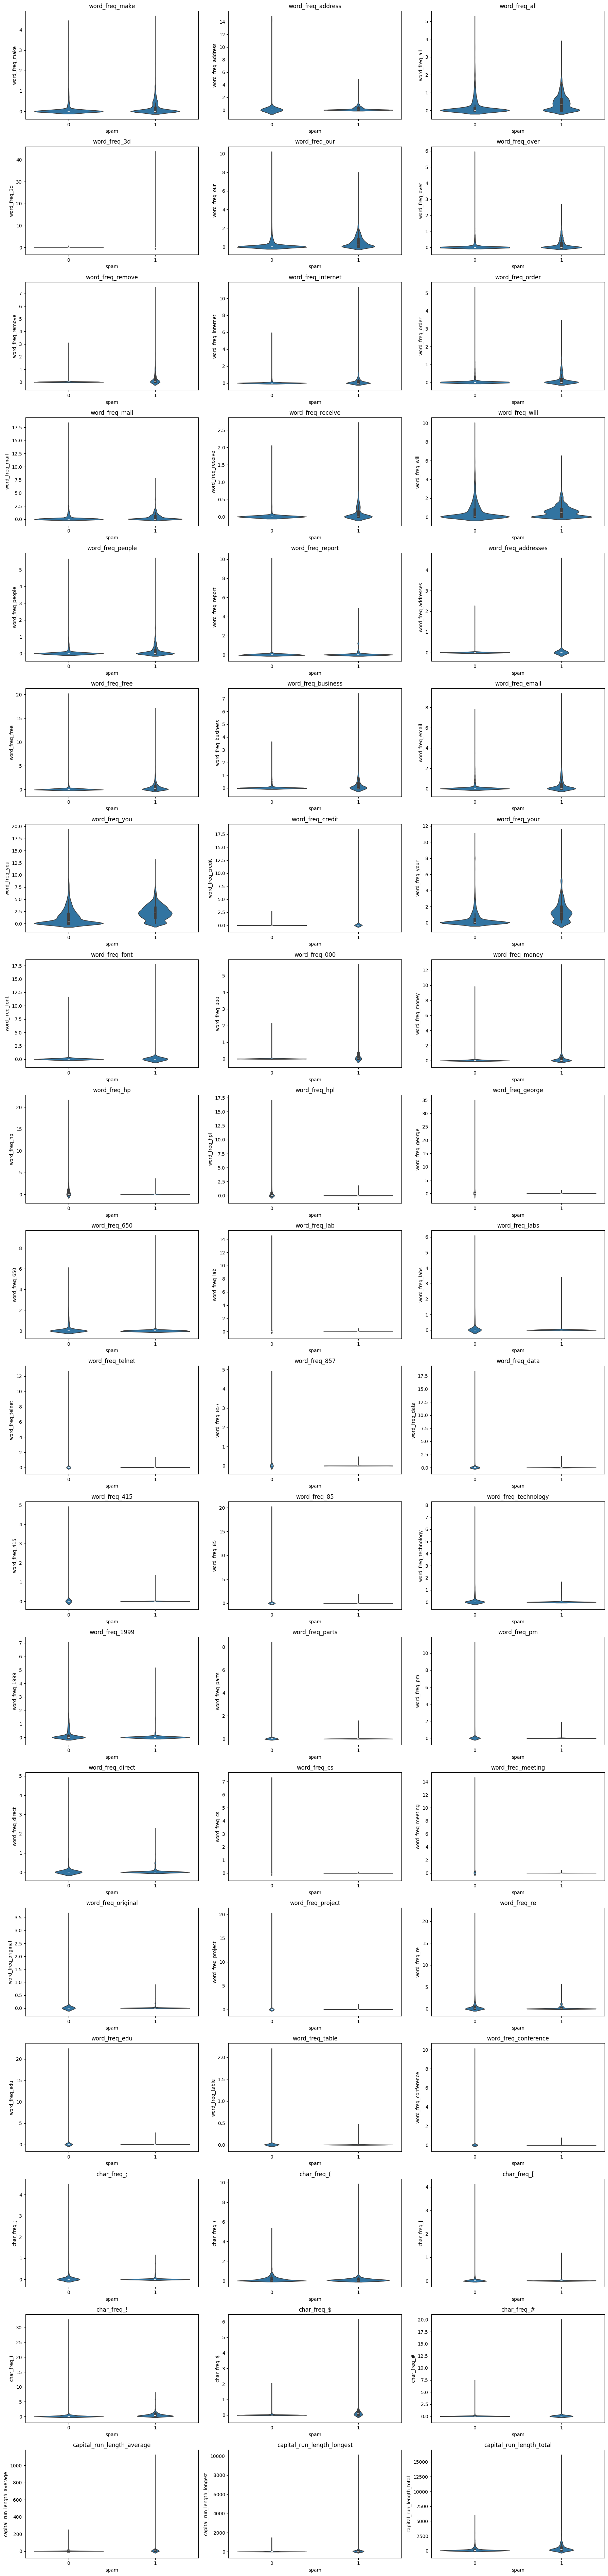

In [32]:
def plot_feature_distributions(dataframe, features, plot_type='boxplot'):
    n_cols = 3
    n_rows = len(features) // n_cols + (len(features) % n_cols > 0)
    plt.figure(figsize=(n_cols * 6, n_rows * 4))

    for index, feature in enumerate(features, 1):
        plt.subplot(n_rows, n_cols, index)
        if plot_type == 'boxplot':
            sns.boxplot(x='spam', y=feature, data=dataframe)
        elif plot_type == 'violinplot':
            sns.violinplot(x='spam', y=feature, data=dataframe)
        plt.title(feature)
        plt.tight_layout()

# Plotting Boxplots for all features
plot_feature_distributions(df, feature_names, plot_type='violinplot')

**Skewed Distributions**: Most features show distributions that are heavily skewed towards the lower end, indicating that for most emails, these words or characters are used infrequently.

**Sparse Features**: The concentration of data near zero for many features suggests sparsity in the dataset. This means that many of these attributes have a lot of zeros or near-zero values, which is typical in text data.

**Presence of Outliers**: The long tails in the violin plots, especially for the 'spam' class, indicate the presence of outliers. These are emails where specific words or characters are used much more frequently than average.

**Class Overlap**: There is a significant overlap in the distributions of word frequencies for the 'spam' and 'non-spam' classes, which suggests that many words alone may not be strong discriminators between the two classes.

**Class Differentiation**: Some violin plots show differences in the distribution between the 'spam' and 'non-spam' classes, which may indicate that certain words are more indicative of spam. However, the differences are not pronounced across all features.

**Feature Predictive Power**: A few features show noticeable differences in the density and spread between classes (e.g., some words may appear with a slightly higher frequency in the 'spam' class), which could make them more informative for predicting spam.

**Importance of Context**: Since the frequency of a single word or character might not be highly predictive, the context or combination of these features might be necessary to effectively distinguish spam from non-spam.

**Potential for Feature Engineering**: Given the sparsity and skewness, feature engineering such as creating binary features (presence vs. absence) or using feature transformations could be explored to enhance the predictive power.

 The overall pattern from these violin plots suggests that the raw frequency of most words and characters does not vary widely between spam and non-spam classes. The presence of outliers suggests that there are exceptional cases where certain words or characters are highly frequent, which might be characteristic of spam. The next step would be to use these insights for feature selection, transformation, and model training, bearing in mind that a combination of features and the use of machine learning models capable of capturing complex patterns will likely be necessary for effective spam detection.

### 4. b Correlation Analysis

* Correlation Matrix: Heatmap for all features.
* Pairplot: For a selected few highly correlated with the target.

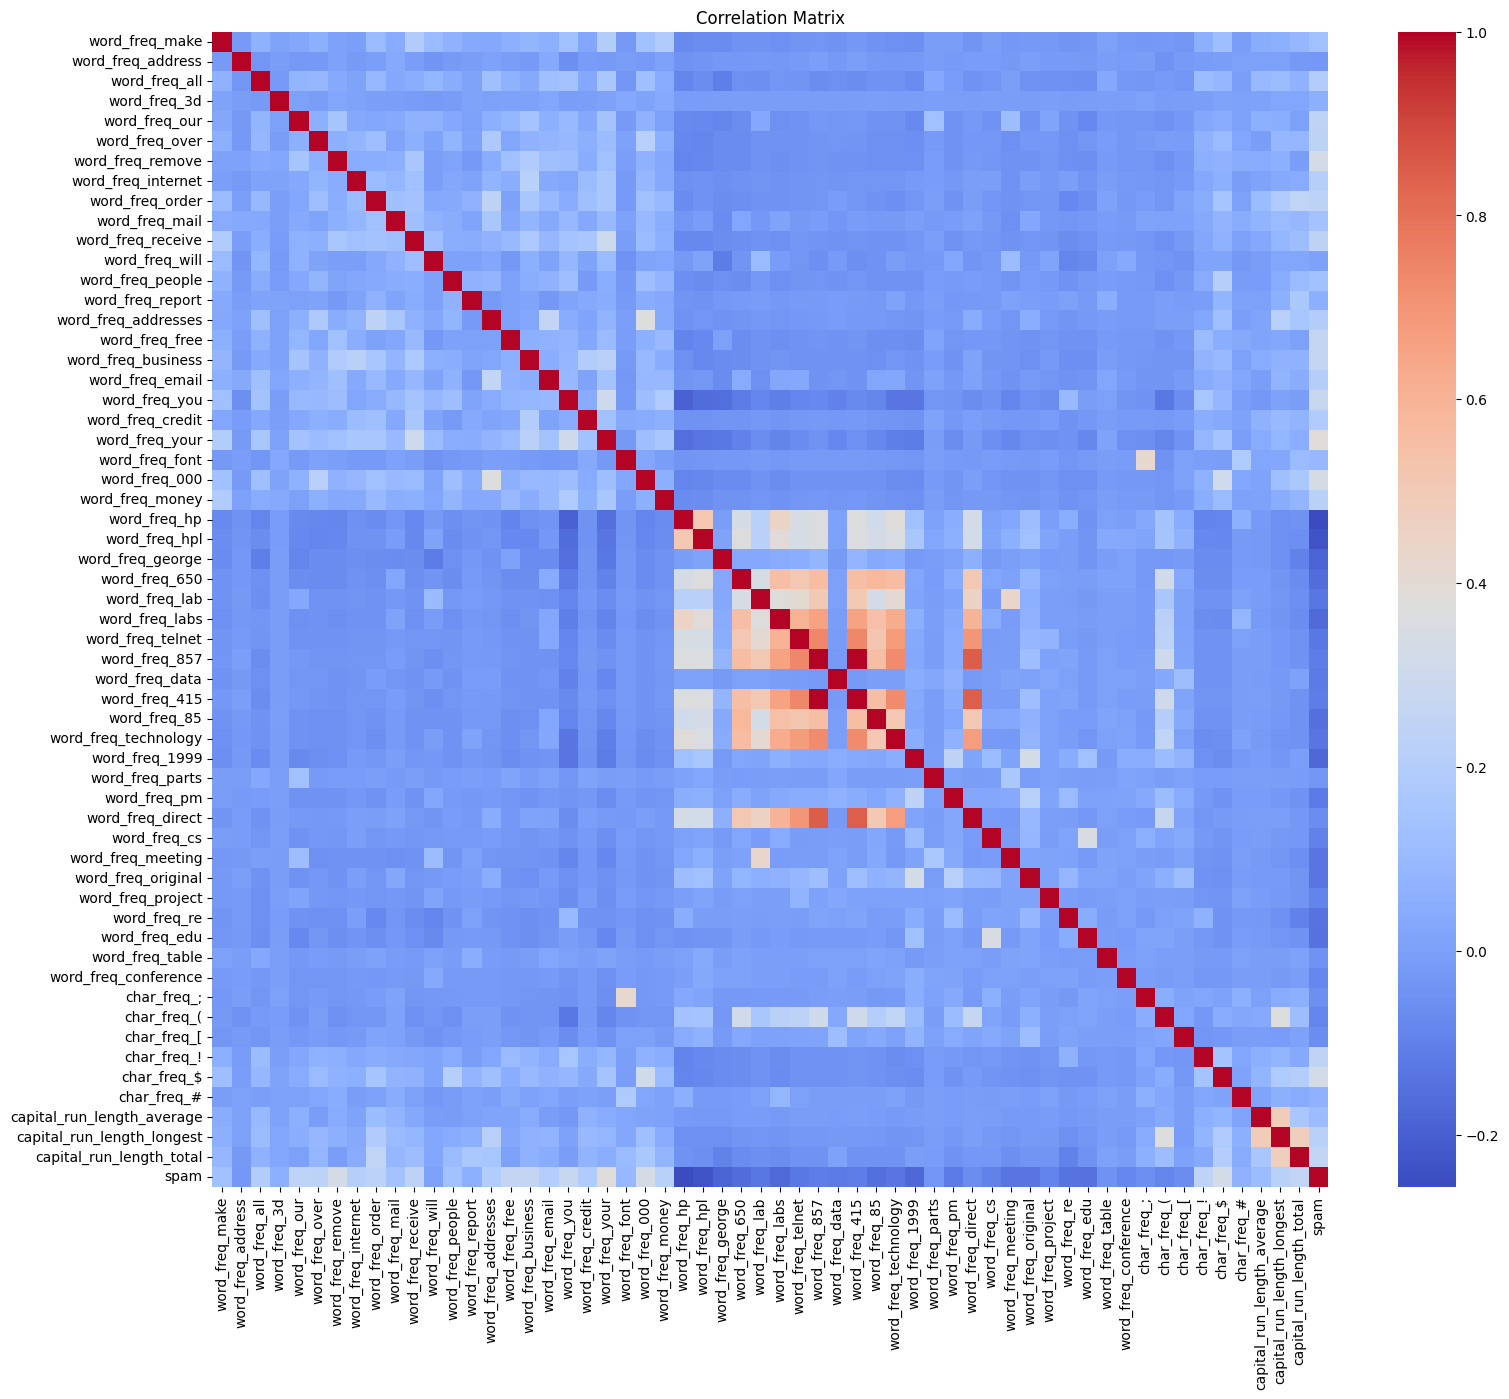

In [33]:
# Correlation Matrix: Create a heatmap

correlation_matrix = df.corr()

plt.figure(figsize=(18, 15))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

**Clusters of Correlation**: Blocks of darker colors off the diagonal suggest clusters of features that are highly correlated with each other. This could indicate redundant information, which might be a result of the features capturing similar types of information in the text.

**Correlation with Target Variable**: The last row/column, labeled 'spam', shows how each feature correlates with the target variable (whether an email is spam). Darker red colors in this row/column would indicate a stronger positive correlation with the likelihood of being spam.

In the context of using tree-based models for classification, it is not always necessary to remove highly correlated features


1. **Tree-based models can handle multicollinearity**: Decision trees and their ensembles (like Random Forests and Gradient Boosting) inherently handle multicollinearity by choosing the most predictive feature at each split. If two features are highly correlated, the model will choose the one that results in the best split and largely ignore the other.
2. **Feature importance**: If we remove correlated features, we might miss out on the small differences between them that could be important for classification. Keeping them can give us a more nuanced view of feature importance.

But still, we might need to consider removing or combining highly correlated features for the below reasons:
1. **Interpretability**: It can be easier to interpret models with fewer, uncorrelated features.
2. **Redundancy**: Reducing the feature space by removing the redundant features can decrease the complexity of the model, potentially improving generalization.
3. **Computational efficiency**: Fewer features can lead to the faster training time, which can be important for larger datasets or when using computationally expensive models.



In [34]:
# Set a high correlation threshold for feature removal
corr_threshold = 0.9

# Create a mask to identify rows with correlation greater than the threshold
high_corr = (correlation_matrix.abs() > corr_threshold) & (correlation_matrix.abs() < 1)

# Identify the features that are highly correlated and remove one of each pair
to_remove = set()
for col in high_corr:
    if any(high_corr[col]):
        to_remove.add(col)
to_remove

{'word_freq_415', 'word_freq_857'}

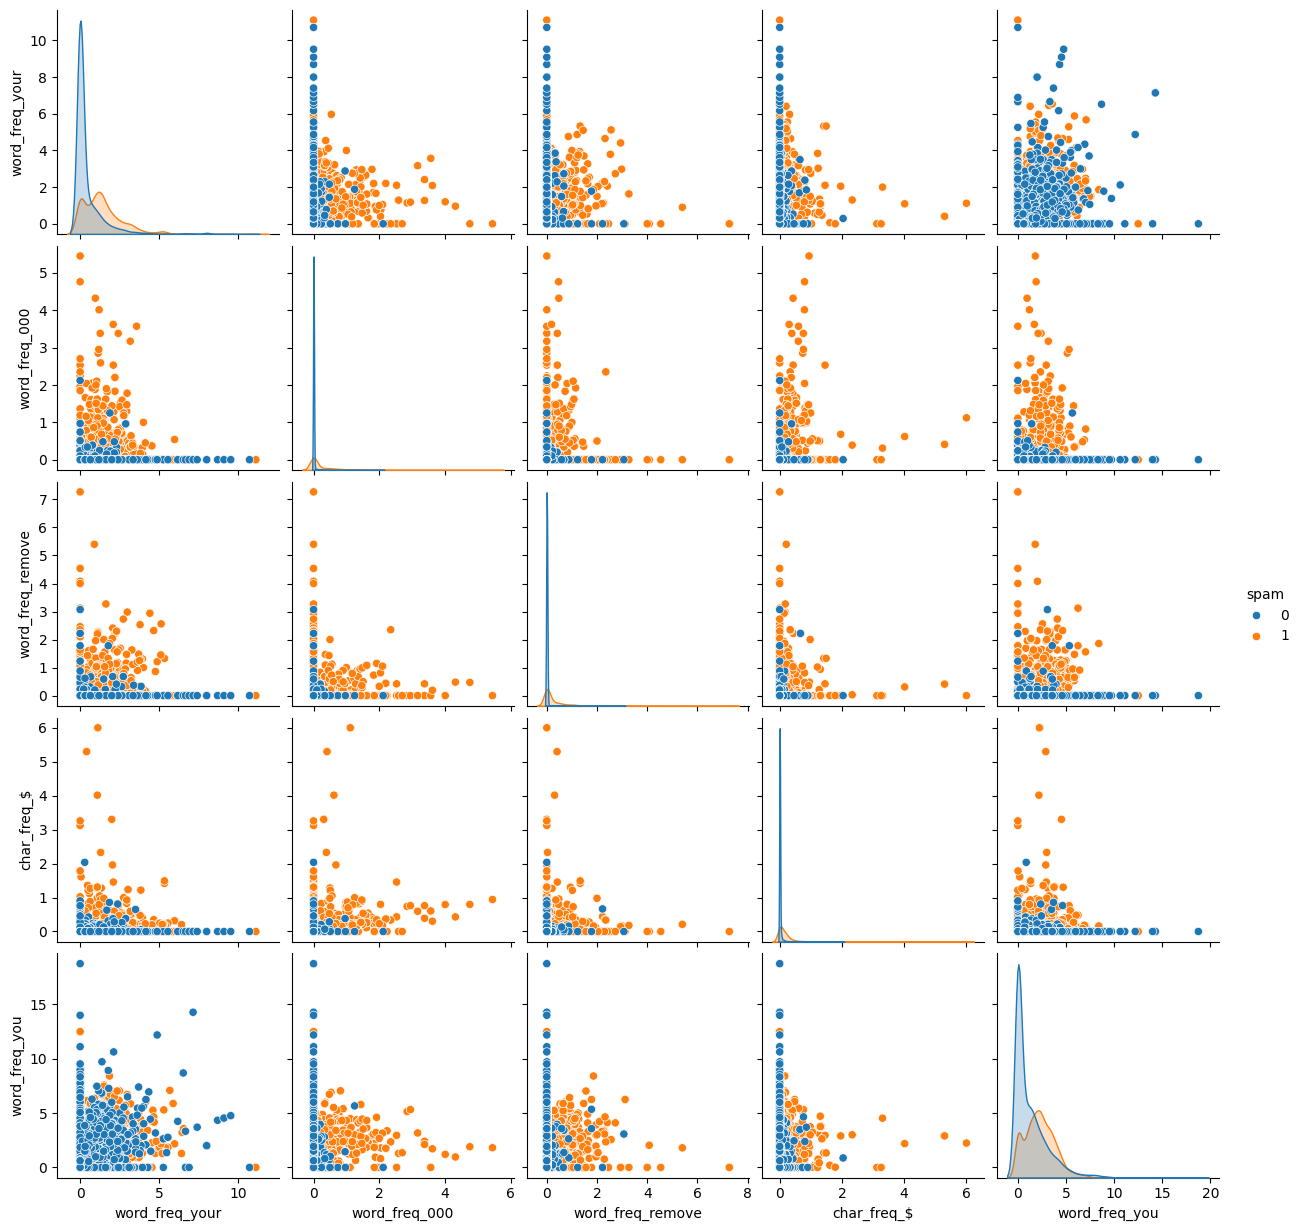

In [35]:
n = 5  # number of top features to select
top_n_corr = correlation_matrix['spam'].abs().sort_values(ascending=False)[1:n+1].index.tolist()
sns.pairplot(df[top_n_corr + ['spam']], hue='spam')
plt.show()

Variables like `word_freq_your` and `char_freq_$` seem to show some separation between classes, suggesting they might be important features in distinguishing spam from non-spam.

There is a noticeable concentration of points near the axes, which indicates many zero or near-zero counts for these features, consistent with sparse data often found in text datasets.

The presence of outliers, especially in the spam class, suggests that certain words or characters are used much more frequently in spam emails, which could be useful for classification.

Some pairs of variables show potential non-linear relationships with the target variable, which might be better captured with complex models or feature transformations.

In summary, the pairplot suggests that while there is some potential for class separation with these features, the relationships are not purely linear, and there are outliers that could influence model performance. 

## 5. Word and Character Frequency Analysis

In [36]:
mean_word_freq = feature_df.filter(like='word_freq').mean()

# Identify the most and least frequent word features
most_frequent_word = mean_word_freq.idxmax()
least_frequent_word = mean_word_freq.idxmin()

print(f'Most frequent word feature: {most_frequent_word} with average frequency of {mean_word_freq.max():.2f}')
print(f'Least frequent word feature: {least_frequent_word} with average frequency of {mean_word_freq.min():.2f}')

# Repeat the process for character-related features if necessary
mean_char_freq = feature_df.filter(like='char_freq').mean()

# Identify the most and least frequent character features
most_frequent_char = mean_char_freq.idxmax()
least_frequent_char = mean_char_freq.idxmin()

print(f'Most frequent character feature: {most_frequent_char} with average frequency of {mean_char_freq.max():.2f}')
print(f'Least frequent character feature: {least_frequent_char} with average frequency of {mean_char_freq.min():.2f}')

Most frequent word feature: word_freq_you with average frequency of 1.66
Least frequent word feature: word_freq_table with average frequency of 0.01
Most frequent character feature: char_freq_! with average frequency of 0.27
Least frequent character feature: char_freq_[ with average frequency of 0.02


## 6. Capitalization Analysis

Analyze capital_run_length_* features for differences in capitalization.

In [25]:
capital_run_length_features = ['capital_run_length_average', 'capital_run_length_longest', 'capital_run_length_total']

In [26]:
# Summary statistics
df[capital_run_length_features].describe()

,capital_run_length_average,capital_run_length_longest,capital_run_length_total
count,4601.000000,4601.000000,4601.000000
mean,5.191515,52.172789,283.289285
std,31.729449,194.891310,606.347851
min,1.000000,1.000000,1.000000
25%,1.588000,6.000000,35.000000
50%,2.276000,15.000000,95.000000
75%,3.706000,43.000000,266.000000
max,1102.500000,9989.000000,15841.000000


In [27]:
# Correlation between features
df[capital_run_length_features].corr()

,capital_run_length_average,capital_run_length_longest,capital_run_length_total
capital_run_length_average,1.000000,0.492638,0.162314
capital_run_length_longest,0.492638,1.000000,0.475486
capital_run_length_total,0.162314,0.475486,1.000000


**capital_run_length_average**:
* It has a moderate positive correlation with capital_run_length_longest (approximately 0.493). This suggests that as the average length of uninterrupted sequences of capital letters increases, there is a tendency for the longest sequence of capital letters to also be longer.

* It has a low positive correlation with capital_run_length_total (approximately 0.162). This indicates a slight relationship where emails with a higher average run of capital letters might have a higher total number of capital letters, but it is a weak relationship.

**capital_run_length_longest**:
* It has a moderate positive correlation with capital_run_length_average, as mentioned above.
* It has a moderate positive correlation with capital_run_length_total (approximately 0.475). This indicates that emails with longer uninterrupted sequences of capital letters tend to also have a higher total count of capital letters.

**capital_run_length_total**:
* It has a low positive correlation with capital_run_length_average.
* It has a moderate positive correlation with capital_run_length_longest.

The correlations suggest that there is some relationship between the length of uninterrupted capital letter sequences and the total amount of capitalization used in the email, which could be meaningful for analysis. For example, spam emails might be more likely to have long sequences of capital letters and also a higher total count of capital letters, which is a common tactic used to attract attention.

However, the low to moderate correlations also imply that these features carry somewhat distinct information and might all be useful to include in a predictive model, although the moderate correlation might warrant caution due to potential multicollinearity issues in some types of models, such as linear regression. In tree-based models, which handle multicollinearity better, all three features could potentially be used without causing issues.

## 7. Outliers and Anomalies Detection

In [37]:
from src.visualization.eda import remove_outliers

In [39]:
df.shape

(4601, 58)

In [40]:
df_cleaned = remove_outliers(df, threshold=3)
print(f'Number of outliers > 3 standard deviations: {df.shape[0] - df_cleaned.shape[0]}')

Number of outliers > 3 standard deviations: 2416


## 8. PCA

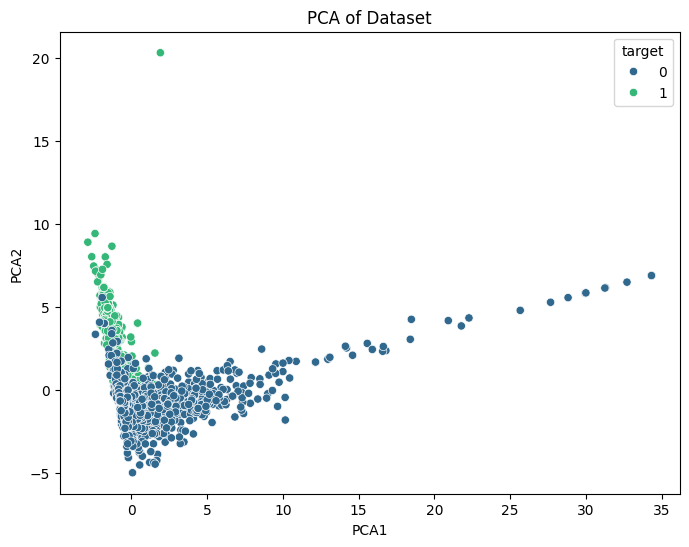

In [41]:

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# PCA: Reduce the dimensionality to 2 components for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(data=X_pca, columns=['PCA1', 'PCA2'])
pca_df['target'] = target

# Plotting the results of PCA
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='target', data=pca_df, palette='viridis')
plt.title('PCA of Dataset')
plt.show()


 The horizontal axis (PCA1) shows the first principal component, which captures the majority of the variance in the dataset. The vertical axis (PCA2) shows the second principal component, which captures the second-most variance. The spread of points along these axes suggests that PCA1 and PCA2 together explain a significant portion of the variance in the dataset.


 **Clustering of Data Points**: While there's a dense cluster where the two classes overlap significantly, there's no clear separation into distinct clusters based on the target variable.

 **Outliers**:  There are a few outlier points, especially in the '1' class ('spam') that stand out. These could be cases with unusual combinations of feature values.

 **Class Separation**: There is a significant overlap between the two classes, suggesting that PCA may not provide a clear linear boundary to separate them.

 **Target Variable Correlation**: The plot suggests that the target variable does not have a clear linear correlation with the first two principal components since the two classes are not distinctly separated.


 In summary, the PCA scatter plot indicates that while PCA has revealed some structure in the data, it does not clearly differentiate between the two classes using the first two principal components alone. This suggests that the classification problem may require more complex models that can capture non-linear relationships or interactions between features, or that more than two components may be needed to adequately separate the classes. The presence of outliers may also warrant further investigation or special consideration in the modeling process.

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 4601 samples in 0.001s...
[t-SNE] Computed neighbors for 4601 samples in 0.480s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4601
[t-SNE] Computed conditional probabilities for sample 2000 / 4601
[t-SNE] Computed conditional probabilities for sample 3000 / 4601
[t-SNE] Computed conditional probabilities for sample 4000 / 4601
[t-SNE] Computed conditional probabilities for sample 4601 / 4601
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 80.269051
[t-SNE] KL divergence after 300 iterations: 2.226097


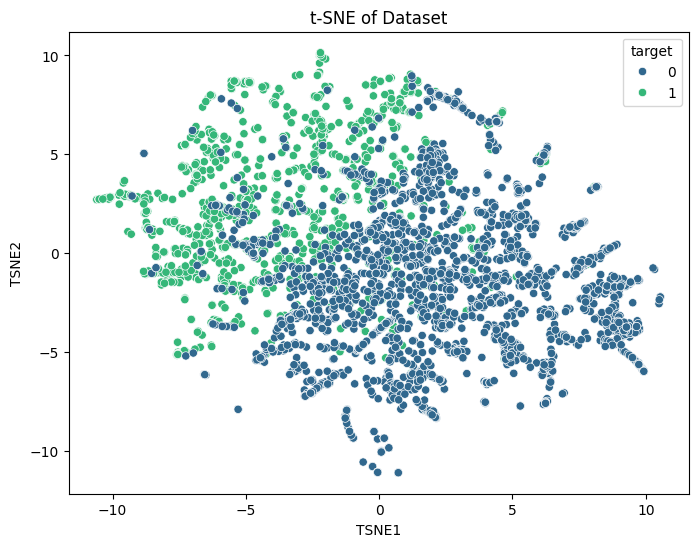

In [42]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
X_tsne = tsne.fit_transform(X_scaled)

tsne_df = pd.DataFrame(data=X_tsne, columns=['TSNE1', 'TSNE2'])
tsne_df['target'] = target

plt.figure(figsize=(8, 6))
sns.scatterplot(x='TSNE1', y='TSNE2', hue='target', data=tsne_df, palette='viridis')
plt.title('t-SNE of Dataset')
plt.show()

**Cluster Formation**: While there's no clear separation into distinct clusters, there seems to be a slight tendency for the green points (class '1') to be more concentrated in certain areas, although they are interspersed among the blue points (class '0').

It seems that the dataset has some local grouping, but the classes are not clearly separable into distinct clusters. This could indicate that the decision boundary between classes is complex and not linear, which might require sophisticated algorithms capable of capturing these complexities to accurately classify the points.